Yiting Wang <br>
Oct 10, 2019

# Background

This case is an example of a real-life forecasting situation where limited data is available and multiple factors contribute to making a "business case" for a new venture.  As with any case, you should seek to understand the case by visualizing the data and building a "simulation" capability that would allow you to replicate distributions and compute p&l given non-Gaussian distributions.  Such a capability is often called a Monte Carlo simulation -- hence the name of the case's protagonist.

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from prettytable import PrettyTable

%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm # Time Series Analysis
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

In [2]:
plt.rcParams['figure.figsize'] = 15,8

## Q1 ##

Ignoring the uncertainy, assume that Saturday attendance is 24,139, that 18.92% of Saturday attendees will buy the DVD, and that 4,500 DVDs are produced.  Build a function that can calculate p&l given:

(i) a forecast quantity, and  
(ii) actual demand

How much profit will be made on the DVD project if this scenario occurs?  Make a recommendation about whether Monte should have the check delivered today to the video crew for their fees.

In [3]:
n = 24139  
p = 0.1892
n_dvd = 4500

In [4]:
forecast = n * p 
actual = n_dvd

In [5]:
def get_pnl(forecast, dvd_burned, show = False):
    n = max(min(forecast, dvd_burned),0)
    revenue = 18 * n 
    recording_cost = 11740
    dvd_edit_cost = 3000
    dvd_production = 1250
    dvd_unit_cost = 0.86
    exceed_bar = 5300
    add_unit_cost = 0.2
    royalty_unit = 1.02
    fixed_cost = recording_cost + dvd_edit_cost + dvd_production
    if dvd_burned < 5300:
        variable_cost = dvd_unit_cost * dvd_burned + royalty_unit * n
    else:
        variable_cost = dvd_unit_cost * dvd_burned + add_unit_cost * (dvd_burned - 5300) + royalty_unit * n
        
    pnl = revenue - fixed_cost - variable_cost
    print("number of DVD burned: ", dvd_burned)
    print("number of forecasted purchase: ", forecast)
    print("number of DVD sold: ", n)
    print('Profit from this senario is: $', pnl)
    
    if show:
        x = PrettyTable()
        x.field_names = ["  ", "Debit", "Credit"]
        x.add_row(["revenue", revenue, " "])     
        x.add_row(["recording cost", " " ,recording_cost]) 
        x.add_row(["DVD editing cost", " " ,dvd_edit_cost])
        x.add_row(["DVD production cost", " " ,dvd_production])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["fixed cost", " ", fixed_cost])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["dvd burned cost", " " , dvd_unit_cost * dvd_burned])
        x.add_row(["royalty cost", " " , royalty_unit * n])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["variable cost", " ", variable_cost])
        x.add_row(["====================", "=======" ,"========"])
        x.add_row(["profit & loss", " ", pnl])
        
        print(x)

In [6]:
get_pnl(forecast, dvd_burned = 4500, show = True)

number of DVD burned:  4500
number of forecasted purchase:  4567.0988
number of DVD sold:  4500
Profit from this senario is: $ 56550.0
+----------------------+---------+----------+
|                      |  Debit  |  Credit  |
+----------------------+---------+----------+
|       revenue        |  81000  |          |
|    recording cost    |         |  11740   |
|   DVD editing cost   |         |   3000   |
| DVD production cost  |         |   1250   |
| -------------------- | ------- | -------- |
|      fixed cost      |         |  15990   |
| -------------------- | ------- | -------- |
|   dvd burned cost    |         |  3870.0  |
|     royalty cost     |         |  4590.0  |
| -------------------- | ------- | -------- |
|    variable cost     |         |  8460.0  |
| ==================== | ======= | ======== |
|    profit & loss     |         | 56550.0  |
+----------------------+---------+----------+


If 4500 DVDs are produced, attendance is 24139 with 18.92% of purchasing rate, the forecast quantity is 4567 DVDs and the actual supply is 4500 DVDs. The profit of selling 4500 DVDs is $ 56,550. Monte should have the check delivered today since it would generate a positive profit. 

## Q2 ##

Please provide a forecast for attendance at Saturday night's performance using case Exhibit 1 only.  Please acknowledge the uncertainty and a probability distribution.

In [7]:
df = pd.read_excel('LacLeman.xls', sheetname='A Exhibit 1')
print("Column headings:", df.columns)
df2 = df.drop(df.tail(2).index,inplace=True)

Column headings: Index(['Year', 'Saturday Attendance'], dtype='object')


C:\Users\TanK\Anaconda\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [8]:
df

,Year,Saturday Attendance
0,1,6510.0
1,2,43580.0
2,3,39360.0
3,4,28590.0
4,5,33560.0
5,6,13710.0
6,7,15410.0
7,8,24190.0
8,9,14240.0
9,10,19310.0


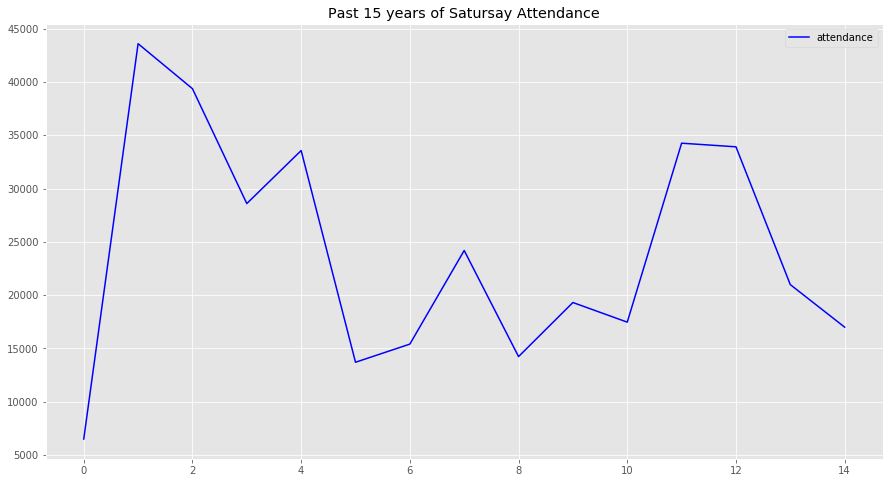

In [9]:
plt.plot(df['Saturday Attendance'], c='b', label='attendance')
plt.legend()
plt.title('Past 15 years of Satursay Attendance')
plt.show()

(array([1., 1., 4., 2., 1., 1., 0., 3., 1., 1.]),
 array([ 6510., 10217., 13924., 17631., 21338., 25045., 28752., 32459.,
        36166., 39873., 43580.]),
 <a list of 10 Patch objects>)

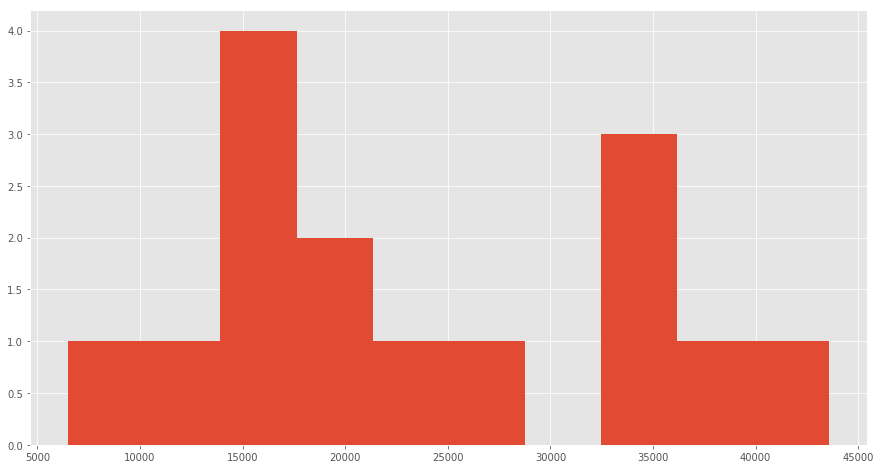

In [10]:
plt.hist(df['Saturday Attendance'])

In [11]:
import statistics as st
mean = st.mean(df['Saturday Attendance'])
sd = st.stdev(df['Saturday Attendance'])
mean, sd

(24138.666666666668, 10817.687148281524)

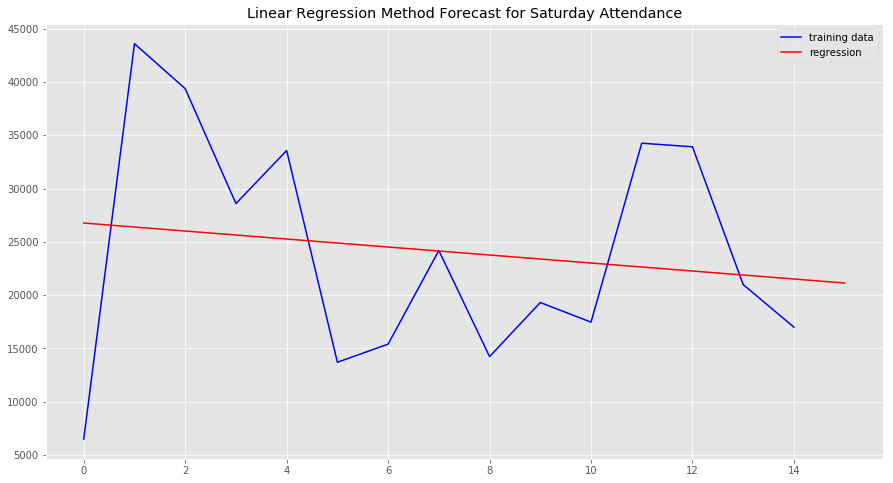

Linear Regression Prediction without split:  21139.809523809527


In [17]:
# without split
Y = np.array(df['Saturday Attendance'].tolist())
X = np.array(range(len(Y)))

# y = m * x + b
(m, b, r_value, p_value, std_err) = stats.linregress(X,Y)

X_hat = np.array(range(len(Y) + 1))
Y_hat = m * X_hat + b

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='regression')
plt.legend()
plt.title('Linear Regression Method Forecast for Saturday Attendance')
plt.show()
print('Linear Regression Prediction without split: ', Y_hat[-1])

Since the Saturday attendance is uncertain, and probability distribution of attendance is unknown, using the basic linear regression without splitting to estimate the upcoming Saturday attendance is not a bad choice. The estimated number of attendance is 21139. 

#### Rank the 15 years of Attendance

In [12]:
x = list(df['Saturday Attendance'])

In [13]:
x.sort()

the 80% confidence interval for Saturday attence is:  13710.0 - 34250.0


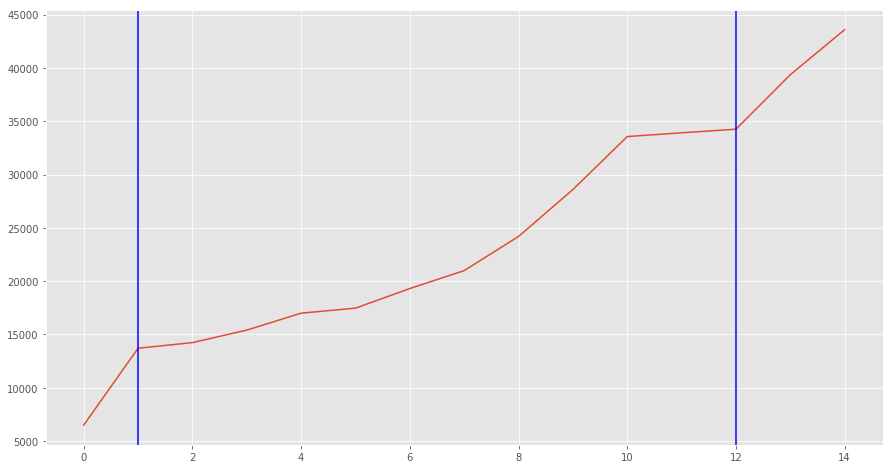

In [22]:
plt.plot([i for i in range(len(x))], x)
plt.axvline(x=12, color = 'b')
plt.axvline(x=1, color = 'b')
print("the 80% confidence interval for Saturday attence is: ", x[1],"-", x[12])

### Simulation

In [18]:
# random samlping with replacement
attendance = np.random.choice(df['Saturday Attendance'], 10000)

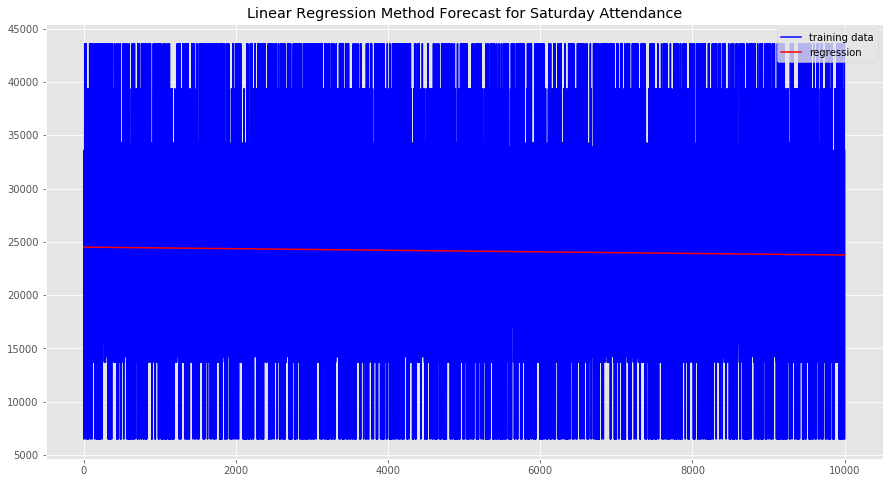

Linear Regression Prediction without split:  23763.168798679868


In [19]:
# Use simulated data
# without split
Y = np.array(attendance.tolist())
X = np.array(range(len(Y)))

# y = m * x + b
(m, b, r_value, p_value, std_err) = stats.linregress(X,Y)

X_hat = np.array(range(len(Y) + 1))
Y_hat = m * X_hat + b

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='regression')
plt.legend()
plt.title('Linear Regression Method Forecast for Saturday Attendance')
plt.show()
print('Linear Regression Prediction without split: ', Y_hat[-1])

In [25]:
attendance.sort()

In [29]:
len(attendance)

10000

the 80% confidence interval for Saturday attence is:  13710.0 - 39360.0


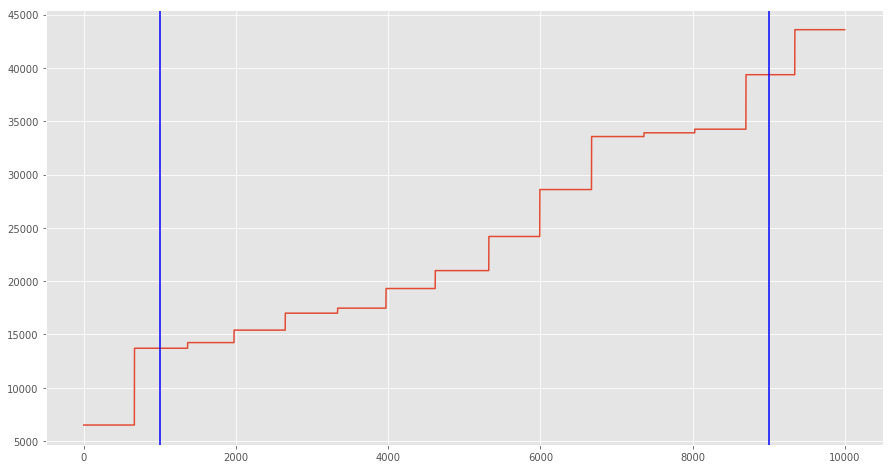

In [30]:
plt.plot([i for i in range(len(attendance))], attendance)
plt.axvline(x=9000, color = 'b')
plt.axvline(x=1000, color = 'b')
print("the 80% confidence interval for Saturday attence is: ", attendance[1000],"-", attendance[9000])

## Q3

Fyno has stated (case Exhibit 2) that he estimates the mean proportion of attendees who will buy the DVD to be 0.1892.  He also believes that there is uncertainty in this number which based on a sample of 37 individuals.  If on individual's outcome has a standard deviation of 0.3917, what is the standard deviation of the average proportion of 37 people?  Use this standard deviation along with the mean of 0.1892 in your analysis of later questions.

Among the 37 replies, 7 said yes. Individual's outcome has a standard deviation of 0.3917. Individual outcome has a Bernoulli distribution, with E(x) = 0.1892, Var(x) = 0.1892 * 0.8108 = 0.1534, sd(x) = 0.3917. Replies of 37 People follow a Binomial distribution with E(x) = 37 * 0.1892, Var(x) = 37 * 0.1892 * 0.8108, sd(x) = sqrt(37 * 0.1534).

In [31]:
np.sqrt(37*.1534)

2.382393754189261

## Q4

The weather forecast seemed important to Fyno, along with the number of people in attendance at Friday's concert.  Make your best use of that information to provide an updated complete forecast of attendance at Saturday's concert.  Produce a histogram of the expected attendance.

In [32]:
df2 = pd.read_excel('LacLeman.xls', sheetname='B Exhibit 1')

C:\Users\TanK\Anaconda\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [33]:
df2.drop(df2.tail(2).index,inplace=True)   # drop last two rows of mean variance

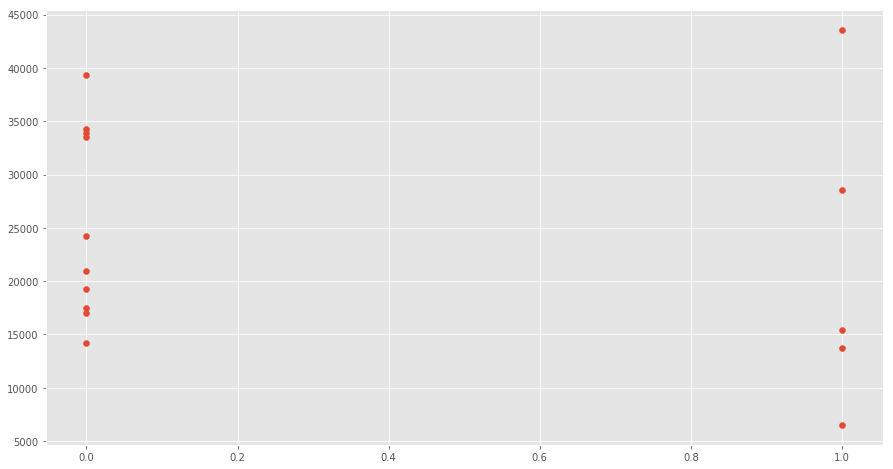

In [34]:
plt.scatter(df2['Friday Rain'],df2['Saturday Attendance'])

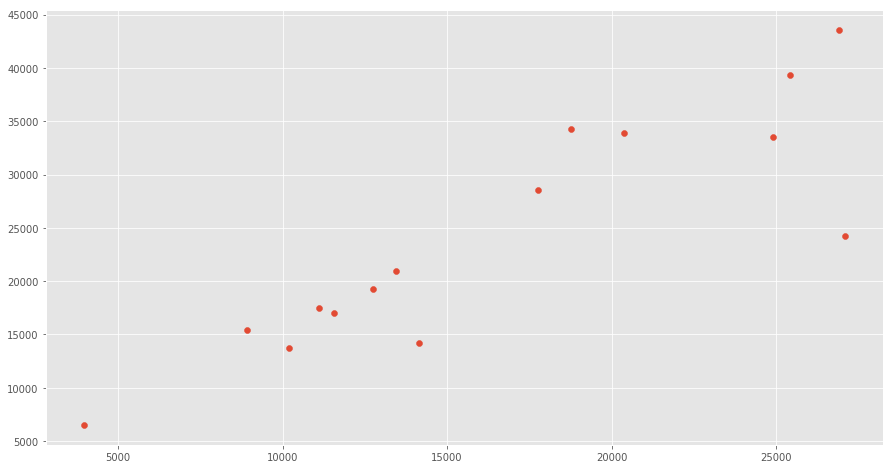

In [35]:
plt.scatter(df2['Friday Attendance'],df2['Saturday Attendance']) # linear relationship 

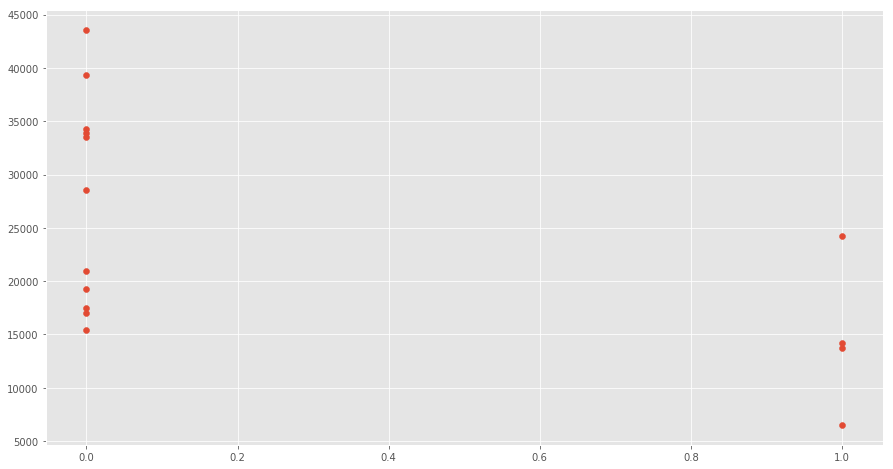

In [36]:
plt.scatter(df2['Saturday Rain'],df2['Saturday Attendance'])

In [38]:
from sklearn import linear_model
import statsmodels.api as sm

Using original data

In [39]:
# regressors: 'Friday Rain', 'Friday Attendance', 'Saturday Rain'
X = df2[['Friday Rain', 'Friday Attendance', 'Saturday Rain']]
Y = df2['Saturday Attendance']

# sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
# New_Year = 16
New_Friday_rain = 0
New_Friday_attendance = 18394
New_Saturday_rain = 0.8
print ('Predicted Saturday Attendance: \n', regr.predict(
    [[New_Friday_rain, New_Friday_attendance, New_Saturday_rain]]))

# Statsmodels                                          
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

Intercept: 
 4777.842241311788
Coefficients: 
 [ 3.49224973e+03  1.25258955e+00 -9.20670088e+03]
Predicted Saturday Attendance: 
 [20452.613695]


C:\Users\TanK\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Saturday Attendance   R-squared:                       0.919
Model:                             OLS   Adj. R-squared:                  0.897
Method:                  Least Squares   F-statistic:                     41.80
Date:                 Mon, 28 Oct 2019   Prob (F-statistic):           2.64e-06
Time:                         00:27:38   Log-Likelihood:                -141.22
No. Observations:                   15   AIC:                             290.4
Df Residuals:                       11   BIC:                             293.3
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4777.8422   2784.729      1.716      0.114   -1351.305    1.09e+04
Friday Rain        3492.2497   2013.177      1.735      0.111    -938.724    7923.223
Friday Attendance     1.2526      0.137      9.173      0.000       0.952       1.553
Saturday Rain     -9206.7009   2104.223     -4.375      0.001   -1.38e+04   -4575.338
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.343
Skew:                           0.143   Prob(JB):                        0.842
Kurtosis:                       2.316   Cond. No.                     6.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariate Linear Regression using Simulation

In [ ]:
# Rain


In [ ]:
# No Rain
